# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [11]:
import gzip
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sea

In [2]:
def parse():
    g = gzip.open("steam_reviews.json.gz", 'r')
    for l in g:
        yield eval(l)

 ## REVIEWS

In [2]:
contador = 10
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse():
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
data_reviews.head(10)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN
5,Szudof,0.2,155.0,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,NaN,Product received for free,3.0
6,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,76561198113497324,NaN,NaN
7,LucaFox,4.0,136.0,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,76561198146674484,NaN,1.0
8,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,76561198080474371,NaN,NaN
9,Devil Azite,0.1,548.0,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,NaN,Product received for free,1.0


In [8]:
data_reviews.to_csv('D:\data_reviews.csv', index = False)

In [2]:
data_reviews = pd.read_csv('data_reviews.csv')

In [3]:
data_reviews.head(10)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,7.656120e+16,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,7.656120e+16,NaN,NaN
5,Szudof,0.2,155.0,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,NaN,Product received for free,3.0
6,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,7.656120e+16,NaN,NaN
7,LucaFox,4.0,136.0,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,7.656120e+16,NaN,1.0
8,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,7.656120e+16,NaN,NaN
9,Devil Azite,0.1,548.0,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,NaN,Product received for free,1.0


In [4]:
cat = (data_reviews.dtypes == 'object')
columnas_categoricas = list(cat[cat].index)

print("Categorical variables:")
print(columnas_categoricas)

Categorical variables:
['username', 'date', 'text', 'compensation']


In [5]:
data_reviews['compensation'] = data_reviews['compensation'].fillna("null")

In [6]:
data_reviews.head(10)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,null,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,null,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,null,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,7.656120e+16,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,7.656120e+16,null,NaN
5,Szudof,0.2,155.0,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,NaN,Product received for free,3.0
6,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,7.656120e+16,null,NaN
7,LucaFox,4.0,136.0,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,7.656120e+16,null,1.0
8,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,7.656120e+16,null,NaN
9,Devil Azite,0.1,548.0,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,NaN,Product received for free,1.0


In [7]:
data_reviews.compensation.value_counts()

null                         764719
Product received for free     14588
Name: compensation, dtype: int64

In [8]:
compensation= {'null': 0, 'Product received for free': 1}

In [9]:
data_reviews['compensation'] = data_reviews.compensation.map(compensation)

In [10]:
data_reviews.head(10)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,0,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,0,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,0,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,7.656120e+16,1,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,7.656120e+16,0,NaN
5,Szudof,0.2,155.0,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,NaN,1,3.0
6,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,7.656120e+16,0,NaN
7,LucaFox,4.0,136.0,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,7.656120e+16,0,1.0
8,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,7.656120e+16,0,NaN
9,Devil Azite,0.1,548.0,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,NaN,1,1.0


In [12]:
data_reviews.isna().sum()

username            18
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text              1839
early_access         0
page                 0
user_id         461967
compensation         0
found_funny     659143
dtype: int64

In [13]:
data_reviews.dropna(subset = ["username"], inplace=True)

In [14]:
data_reviews.dropna(subset = ["text"], inplace=True)

In [15]:
data_reviews['hours'].fillna((data_reviews['hours'].mean()), inplace=True)

In [16]:
data_reviews['products'].fillna((data_reviews['products'].mean()), inplace=True)

In [17]:
data_reviews['found_funny'] = data_reviews['found_funny'].fillna(0)

In [18]:
data_reviews.rename({'product_id': 'id'}, axis=1, inplace=True)

In [19]:
data_reviews.found_funny.value_counts()

0.0       657695
1.0        69916
2.0        19551
3.0         8443
4.0         4843
           ...  
1075.0         1
270.0          1
1094.0         1
1097.0         1
4080.0         1
Name: found_funny, Length: 632, dtype: int64

In [20]:
import random
data_reviews['user_id'] = data_reviews['user_id'].apply(lambda v: random.random() * 8000)

In [21]:
data_reviews.head(10)

,username,hours,products,id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,3008.147612,0,0.0
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,2147.761640,0,0.0
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,2989.674840,0,0.0
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,6193.617582,1,0.0
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,2681.710833,0,0.0
5,Szudof,0.2,155.0,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,3315.928281,1,3.0
6,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,5483.252691,0,0.0
7,LucaFox,4.0,136.0,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,2881.822255,0,1.0
8,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,49.286756,0,0.0
9,Devil Azite,0.1,548.0,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,6576.031165,1,1.0


In [22]:
data_reviews.to_csv('D:\data_reviews1.csv', index = False)

In [23]:
data_reviews1 = pd.read_csv('data_reviews1.csv')

In [24]:
data_reviews['id'] = data_reviews['id'].astype(float)

In [25]:
data_reviews.dtypes

username         object
hours           float64
products        float64
id              float64
page_order        int64
date             object
text             object
early_access       bool
page              int64
user_id         float64
compensation      int64
found_funny     float64
dtype: object

<AxesSubplot:xlabel='found_funny', ylabel='compensation'>

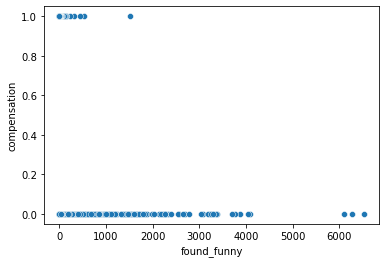

In [26]:
sea.scatterplot(data=data_reviews1, x="found_funny", y="compensation")

<AxesSubplot:xlabel='hours', ylabel='compensation'>

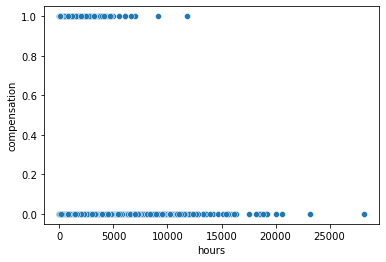

In [27]:
sea.scatterplot(data=data_reviews1, x="hours", y="compensation")

<AxesSubplot:xlabel='hours', ylabel='found_funny'>

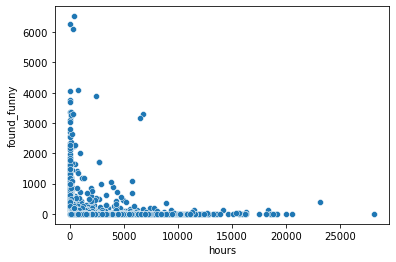

In [28]:
sea.scatterplot(data=data_reviews1, x="hours", y="found_funny")

No existe relacion entre la cantidad de horas y cuan divertido les resulta el videojuego

## GAMES

In [29]:
def parse():
    g = gzip.open("steam_games.json.gz", 'r')
    for l in g:
        yield eval(l)

In [30]:
data_games = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse():
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [31]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [32]:
data_games.to_csv('D:\data_games.csv', index = False)

In [33]:
data_games = pd.read_csv('data_games.csv')

In [34]:
data_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [35]:
data_games.isna().sum()

publisher          8062
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29528
dtype: int64

In [36]:
data_games.sentiment.value_counts()

Mixed                      4103
Very Positive              3868
Positive                   3281
Mostly Positive            2744
1 user reviews             2496
2 user reviews             1756
3 user reviews             1231
4 user reviews              964
5 user reviews              846
Mostly Negative             802
6 user reviews              756
7 user reviews              619
8 user reviews              537
9 user reviews              488
Overwhelmingly Positive     303
Negative                    123
Very Negative                29
Overwhelmingly Negative       7
Name: sentiment, dtype: int64

In [37]:
Sentiment= {'Overwhelmingly Positive': 10, 'Very Positive': 9, 'Mostly Positive': 8,'Positive': 7,'Mixed': 6, 'Negative': 5, 'Mostly Negative': 4, 'Very Negative': 3, 'Overwhelmingly Negative': 2}

In [38]:
data_games['sentiment'] = data_games.sentiment.map(Sentiment)

In [39]:
data_games.loc[(data_games.price == 'Free To Play'),'price']='0'

In [40]:
data_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0,False,643980.0,Secret Level SRL,8.0,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,8.0,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [41]:
data_games.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price              object
early_access         bool
id                float64
developer          object
sentiment         float64
metascore         float64
dtype: object

In [42]:
data_games.sentiment.value_counts()

6.0     4103
9.0     3868
7.0     3281
8.0     2744
4.0      802
10.0     303
5.0      123
3.0       29
2.0        7
Name: sentiment, dtype: int64

In [43]:
data_games.metascore.value_counts()

80.0    125
74.0    107
77.0    104
75.0    103
76.0    102
       ... 
42.0      1
33.0      1
34.0      1
20.0      1
29.0      1
Name: metascore, Length: 70, dtype: int64

In [44]:
data_games.price.value_counts()

4.99      4278
9.99      3902
2.99      3429
0.99      2607
1.99      2541
          ... 
320.0        1
12.0         1
9.98         1
189.96       1
7.0          1
Name: price, Length: 162, dtype: int64

In [45]:
#data_games['metascore'].fillna((data_games['metascore'].()), inplace=True)

<AxesSubplot:xlabel='price', ylabel='sentiment'>

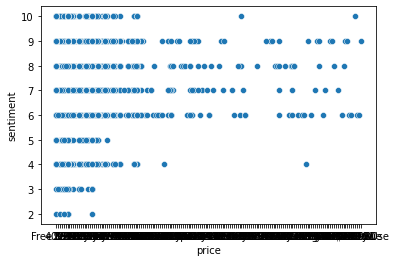

In [46]:
sea.scatterplot(data=data_games, x="price", y="sentiment")

<AxesSubplot:xlabel='price', ylabel='metascore'>

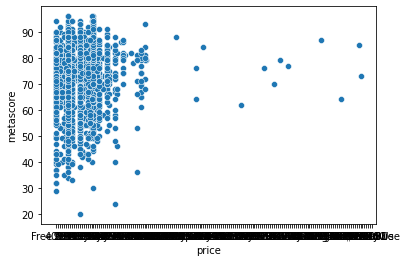

In [47]:
sea.scatterplot(data=data_games, x="price", y="metascore")

In [48]:
data_games.isna().sum()

publisher          8062
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment         16875
metascore         29528
dtype: int64

In [49]:
data_games.dropna(subset = ["app_name"], inplace=True)

In [50]:
data_games.dropna(subset = ["reviews_url"], inplace=True)

In [51]:
data_games.dropna(subset = ["id"], inplace=True)

In [52]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0,False,643980.0,Secret Level SRL,8.0,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,8.0,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [53]:
data_games.to_csv('D:\data_games1.csv', index = False)

In [54]:
data_games1 = pd.read_csv('data_games1.csv')

# SISTEMA DE RECOMENDACION

#### La funcion del sistema de recomendacion en completar una matriz, con datos faltantes, analizando el comportamiento de los usuarios. Se debe escoger una estrategia para completar la matriz, entre ellas, el modelo benchmark, basado en contenidos, filtros colaborativos, o arbol de decision.

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### El filtro de colaboracion se usa para construir sistema de recomendacion que den una sugerencia al usuario sobre lo que puede gustar o no basandonos en reacciones de usuarios similares. funciona creando un grupo amplio de usuarios con gustos similares, luego analiza los items de agrado para este grupo y los combina para crear un ranking de sugerencias


### para crear un sistema de recomendacion es necesario una serie de items y una serie de usuarios que hayan reaccionado a dichos items.
### La reaccion puede ser implicita (una accion que indique agrado) o explicita (un puntaje dado). 
### Los pasos a seguir son:
### dterminar los usuarios o items que se parezcan
### determinar el rating que el usuario va a darle a un item basandonos en el rating que usuarios similares le dieron a ese item
### Determinar la exactitud con la que se realizaron los calculos.(rmsw o mae)

### Los tipos  de algoritmos en la familia de filtros colaborativos son:
- memory based: se usan tecnicas de estadistica para calcular predicciones
- model based: involucra un proceso para reducir o comprimir la matriz, mediante una reuduccion de dimensionalidad.
- Las dimensiones que se reducen son el numero de usuarios y el numero de items.

## Libreria surprise

### Dentro de las base review encontramos el id del usuairo, el nombre y el id del juego del que escribio la reseña, y dentro de la base games encontramos el id del usuario  y el puntaje general que le otorgo al juego dicho usuario

In [55]:
df_completo = pd.merge(data_reviews, data_games, how='inner', on=['id', 'id'])

In [56]:
df_completo.head(10)

,username,hours,products,id,page_order,date,text,early_access_x,page,user_id,...,release_date,tags,discount_price,reviews_url,specs,price,early_access_y,developer,sentiment,metascore
0,Chaos Syren,0.1,41.0,725280.0,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,3008.147612,...,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",NaN,http://steamcommunity.com/app/725280/reviews/?...,"['Single-player', 'Steam Trading Cards']",2.99,False,Vyacheslav Shilikhin,7.0,NaN
1,freakfantom,0.1,1706.0,725280.0,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,2989.674840,...,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",NaN,http://steamcommunity.com/app/725280/reviews/?...,"['Single-player', 'Steam Trading Cards']",2.99,False,Vyacheslav Shilikhin,7.0,NaN
2,Ariman1,13.2,1386.0,328100.0,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,2147.761640,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
3,dll3z,0.4,314.0,328100.0,5,2017-03-07,do not buy this game,False,2,4188.241099,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
4,Nyazicat,2.2,1224.0,328100.0,1,2017-01-09,For some reason I entirely derped out and boug...,False,3,3990.928561,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
5,novocain,3.8,1340.0,328100.0,2,2015-01-31,"Decent match-3 RPG, but it's a mobile port of ...",False,6,1217.991059,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
6,raixel,3.2,527.0,328100.0,9,2014-12-15,"TL;DR\nIn short, the plot is strange/incompreh...",False,6,3972.538620,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
7,Shwgar,1.4,982.0,328100.0,0,2014-11-30,This game might not be the next big thing but ...,False,7,5657.157787,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
8,Halrawk,2.4,930.0,328100.0,8,2014-11-07,It's an alright game. The puzzle aspect is pre...,False,7,6094.181175,...,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",NaN,http://steamcommunity.com/app/328100/reviews/?...,['Single-player'],14.99,False,Ino-Co Plus,6.0,NaN
9,The_Cpt_FROGGY,7.8,2217.0,631920.0,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,6193.617582,...,2017-09-14,"['Indie', 'Action', 'Puzzle', 'Exploration', '...",NaN,http://steamcommunity.com/app/631920/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",9.99,False,Mykhail Konokh,7.0,NaN


In [57]:
print(df_completo.columns)

Index(['username', 'hours', 'products', 'id', 'page_order', 'date', 'text',
       'early_access_x', 'page', 'user_id', 'compensation', 'found_funny',
       'publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access_y', 'developer', 'sentiment', 'metascore'],
      dtype='object')


## "DF_completo" contiene los datos de cada review sobre cada juego, y el nombre del juego que se trata. Tambien contiene el usuario que realizo la review y los datos de la misma.

### Para usar la libreria surprise, es necesario eliminar algunas columnas del dataframe, para obtener las columnas "user id", "id", y "rating" (sentiment)

In [58]:
df_completo.drop(df_completo.columns.difference(['user_id','app_name','sentiment','id','username']), 1, inplace=True)

In [59]:
df_completo.head()

,username,id,user_id,app_name,sentiment
0,Chaos Syren,725280.0,3008.147612,Psi Project,7.0
1,freakfantom,725280.0,2989.674840,Psi Project,7.0
2,Ariman1,328100.0,2147.761640,Gunspell - Steam Edition,6.0
3,dll3z,328100.0,4188.241099,Gunspell - Steam Edition,6.0
4,Nyazicat,328100.0,3990.928561,Gunspell - Steam Edition,6.0


In [60]:
df_completo.isnull().sum()

username        0
id              0
user_id         0
app_name        0
sentiment    2993
dtype: int64

In [61]:
df_completo['sentiment'].fillna((df_completo['sentiment'].mean()), inplace=True)

In [62]:
df_completo['sentiment'].astype(int)

0         7
1         7
2         6
3         6
4         6
         ..
778089    8
778090    8
778091    8
778092    8
778093    8
Name: sentiment, Length: 778094, dtype: int32

In [63]:
df_completo['user_id'].astype(int)

0         3008
1         2989
2         2147
3         4188
4         3990
          ... 
778089    7107
778090    2681
778091    2611
778092    1012
778093    1947
Name: user_id, Length: 778094, dtype: int32

In [64]:
df_completo['id'].astype('int')

0         725280
1         725280
2         328100
3         328100
4         328100
           ...  
778089    518790
778090    518790
778091    518790
778092    518790
778093    518790
Name: id, Length: 778094, dtype: int32

In [65]:
df_completo.head(10)

,username,id,user_id,app_name,sentiment
0,Chaos Syren,725280.0,3008.147612,Psi Project,7.0
1,freakfantom,725280.0,2989.674840,Psi Project,7.0
2,Ariman1,328100.0,2147.761640,Gunspell - Steam Edition,6.0
3,dll3z,328100.0,4188.241099,Gunspell - Steam Edition,6.0
4,Nyazicat,328100.0,3990.928561,Gunspell - Steam Edition,6.0
5,novocain,328100.0,1217.991059,Gunspell - Steam Edition,6.0
6,raixel,328100.0,3972.538620,Gunspell - Steam Edition,6.0
7,Shwgar,328100.0,5657.157787,Gunspell - Steam Edition,6.0
8,Halrawk,328100.0,6094.181175,Gunspell - Steam Edition,6.0
9,The_Cpt_FROGGY,631920.0,6193.617582,Somewhere on Zibylon,7.0


In [74]:
df_completo.to_csv('D:\df_completo.csv', index = False)

In [12]:
df_completo = pd.read_csv('df_completo.csv')

In [13]:
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
reader = Reader()

In [14]:
df_completo.groupby('app_name')['sentiment'].mean().head()

app_name
! That Bastard Is Trying To Steal Our Gold !    6.000000
"Glow Ball" - The billiard puzzle game          8.508856
"TWO DRAW"                                      8.508856
#monstercakes                                   9.000000
$1 Ride                                         6.000000
Name: sentiment, dtype: float64

In [15]:
df_completo.groupby('app_name')['sentiment'].count().sort_values(ascending=False).head()

app_name
Team Fortress 2       18335
Rust                  10204
Borderlands 2          7301
Fallout 4              7095
Grand Theft Auto V     5963
Name: sentiment, dtype: int64

In [16]:
ratings_mean_count = pd.DataFrame(df_completo.groupby('app_name')['sentiment'].mean())

In [17]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_completo.groupby('app_name')['sentiment'].count())

In [18]:
ratings_mean_count.head()

,sentiment,rating_counts
app_name,,
! That Bastard Is Trying To Steal Our Gold !,6.000000,6
"""Glow Ball"" - The billiard puzzle game",8.508856,5
"""TWO DRAW""",8.508856,1
#monstercakes,9.000000,12
$1 Ride,6.000000,19


In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:>

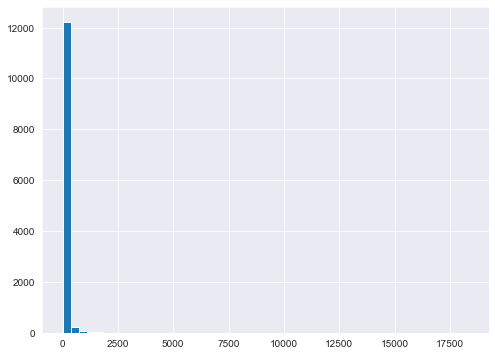

In [20]:
sea.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

## Filtro colaborativo model-based

In [21]:
data = Dataset.load_from_df(df_completo[['id', 'user_id', 'sentiment']], reader)

In [22]:
df_completo.columns

Index(['username', 'id', 'user_id', 'app_name', 'sentiment'], dtype='object')

In [23]:
trainset, testset = train_test_split(data, test_size=.25)

In [24]:
from surprise import SVD
sdv = SVD()

In [25]:
sdv.fit(trainset)

In [26]:
predictions = sdv.test(testset)

In [27]:
predictions[1]

Prediction(uid=12220.0, iid=627.9102251659622, r_ui=8.0, est=5, details={'was_impossible': False})

In [28]:
sdv.predict(725280.0, 3008.147612)

Prediction(uid=725280.0, iid=3008.147612, r_ui=None, est=5, details={'was_impossible': False})

In [29]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 3.7607


3.7606615368088487

## MODELO BENCHMARK

In [108]:
usuario = 725280.0
rating = 7.0   
df_user = df_completo[(df_completo[] == usuario) & (df_completo['sentiment'] >= rating)]
df_user

,username,id,user_id,app_name,sentiment
0,Chaos Syren,725280.0,3008.147612,Psi Project,7.0
1,freakfantom,725280.0,2989.674840,Psi Project,7.0


In [109]:
recomendaciones = df_completo.iloc[:5000].copy()
print(recomendaciones.shape)
recomendaciones.head()

(5000, 5)


,username,id,user_id,app_name,sentiment
0,Chaos Syren,725280.0,3008.147612,Psi Project,7.0
1,freakfantom,725280.0,2989.674840,Psi Project,7.0
2,Ariman1,328100.0,2147.761640,Gunspell - Steam Edition,6.0
3,dll3z,328100.0,4188.241099,Gunspell - Steam Edition,6.0
4,Nyazicat,328100.0,3990.928561,Gunspell - Steam Edition,6.0


In [110]:
vistas = df_completo[df_completo['username'] == usuario]
print(vistas.shape)
vistas.head()

(0, 5)


,username,id,user_id,app_name,sentiment


In [113]:
recomendaciones['Estimate_Score'] = recomendaciones['id'].apply(lambda x: sdv.predict(usuario, x).est)

In [136]:
recomendaciones = recomendaciones.sort_values('Estimate_Score', ascending=False)
print(recomendaciones.head(10))

          username        id      user_id  \
0      Chaos Syren  725280.0  3008.147612   
11             Mia  631920.0   443.485065   
4         Nyazicat  328100.0  3990.928561   
5         novocain  328100.0  1217.991059   
6           raixel  328100.0  3972.538620   
7           Shwgar  328100.0  5657.157787   
8          Halrawk  328100.0  6094.181175   
37      Posith[DW]   35140.0  7649.709413   
9   The_Cpt_FROGGY  631920.0  6193.617582   
12    the_maker988   35140.0  2681.710833   

                                          app_name  sentiment  Estimate_Score  
0                                      Psi Project        7.0               5  
11                            Somewhere on Zibylon        7.0               5  
4                         Gunspell - Steam Edition        6.0               5  
5                         Gunspell - Steam Edition        6.0               5  
6                         Gunspell - Steam Edition        6.0               5  
7                       

### Es posible elaborar una serie de preguntas con cuya respuesta se puede mejorar el modelo, y continuar desarrollandolo. En primer lugar podemos preguntarnos Cual es el desarrollador que mas va a agradarle a un usuario basandonos en lo que usuarios similares escogieron. Una vez que obtenemos la respuesta, y con un universo de datos mas acotado, elegir dentro de los juegos que ese desarrollador elaboro, el juego que mas va a agradarle al usuario. Ademas, el puntaje general no es la unica caracteristica importante. Podemos preguntarnos cual es el juego que mas divertido va a encontrar un usuario, y recomendarselo de acuerdo a opiniones de usuarios similares.
### Para realizar esto se puede desarrollar un sistemad e recomendacion similar al desarrollado pero en lugar de obtener el nombre de la aplicacion, obtener el nombre del desarrollador que cumpla con el criterio de satisfaccion. 
### El resultado que se espera obtener es un modelo que permita recomendar a un usuario un desarrollador basado en la preferencia de usuarios similares. Si bien se va a obtener un analisis menos especificio, al obtener un desarrollador de agrado pero no un juego en particular, dentro de cada desarrollador se puede recomendar un juego y de esta forma agregar un filtro mas al sistema, y obtener una recomendacion mas acertada.

# Link de repositorio github

https://github.com/jcdt/proyecto3ds